In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [6]:
!pip install imblearn

In [8]:
data = pd.read_csv("/content/bank-full.csv")
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [9]:
data.shape

(45211, 1)

In [11]:
data.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')

In [12]:
data.dtypes

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    object
dtype: object

In [13]:
data.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0      58;"management";"married";"tertiary";"no";2143...                                                                                                  
1      44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2      33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3      47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4      33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  
...    

In [14]:
data.median

<bound method NDFrame._add_numeric_operations.<locals>.median of       age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0      58;"management";"married";"tertiary";"no";2143...                                                                                                  
1      44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2      33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3      47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4      33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  
...  

In [15]:
data.var()

<ipython-input-15-6bf595b3cfe5>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


Series([], dtype: float64)

In [17]:
data.std()

<ipython-input-17-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


Series([], dtype: float64)

In [18]:
data.skew()

<ipython-input-18-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Series([], dtype: float64)

In [19]:
data.kurt()

<ipython-input-19-de7992f92dad>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


Series([], dtype: float64)

In [21]:
data.describe()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
count,45211
unique,45211
top,"58;""management"";""married"";""tertiary"";""no"";2143..."
freq,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [23]:
data.isnull().sum()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64

In [31]:
# Check the column names in your DataFrame
print(data.columns)

# Drop columns if they exist
columns_to_drop = ['day', 'month', 'duration']
data1 = data.drop(columns=columns_to_drop, errors='ignore')


Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'], dtype='object')


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [33]:
data1.shape

(45211, 1)

Univariate Analysis

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


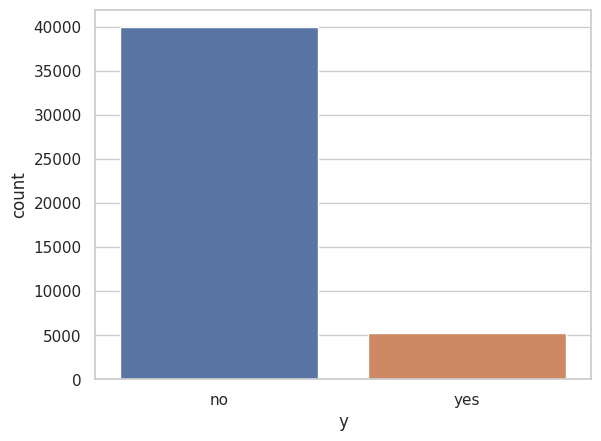

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from a CSV file (assuming your data is in a CSV file)
data = pd.read_csv('/content/bank-full.csv', sep=';')

# Check the first few rows to ensure data is loaded correctly
print(data.head())

# Assuming "y" is a valid column name in your dataset
sns.countplot(x="y", data=data)
plt.show()  # Display the plot


<Axes: xlabel='job', ylabel='count'>

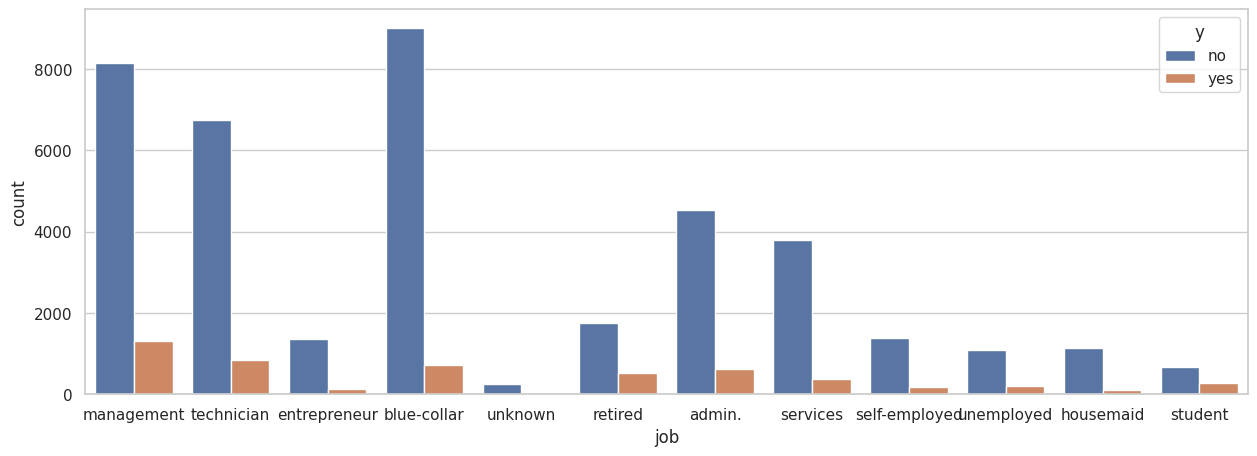

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x="job",data=data,hue = 'y')

<Axes: xlabel='y', ylabel='age'>

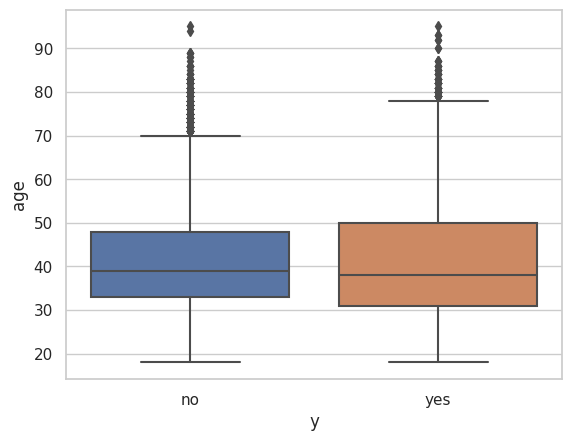

In [59]:
sns.boxplot(data=data,x='y',y='age')

<Axes: xlabel='education', ylabel='count'>

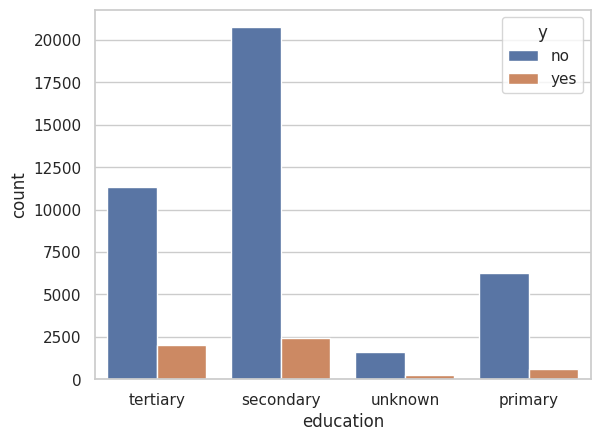

In [60]:
sns.countplot(x="education",data=data,hue = 'y')

<Axes: xlabel='default', ylabel='count'>

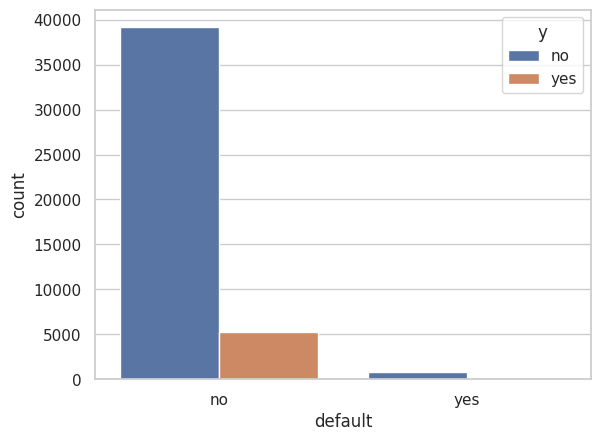

In [61]:
sns.countplot(x="default",data=data,hue = 'y')

<Axes: xlabel='housing', ylabel='count'>

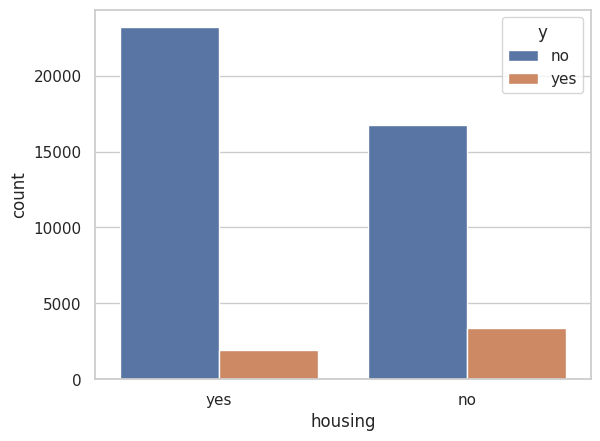

In [62]:
sns.countplot(x="housing",data=data,hue = 'y')

<Axes: xlabel='loan', ylabel='count'>

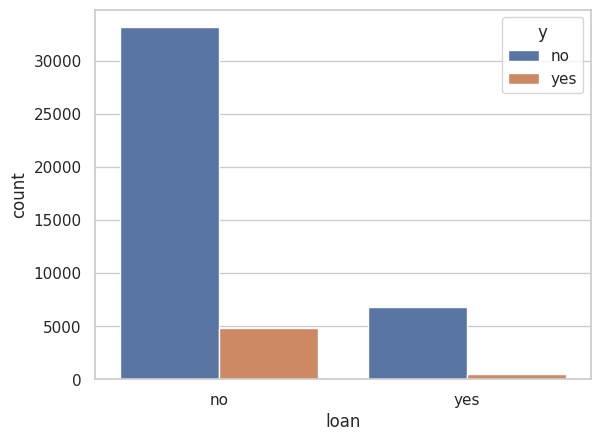

In [63]:
sns.countplot(x="loan",data=data,hue = 'y')

<Axes: xlabel='contact', ylabel='count'>

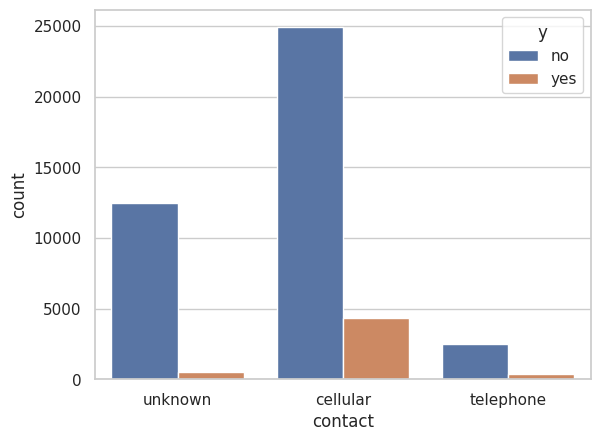

In [64]:
sns.countplot(x="contact",data=data,hue = 'y')

<Axes: xlabel='poutcome', ylabel='count'>

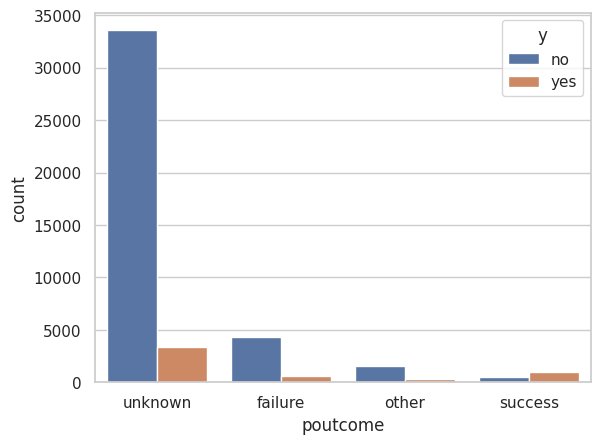

In [65]:
sns.countplot(x="poutcome",data=data,hue = 'y')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

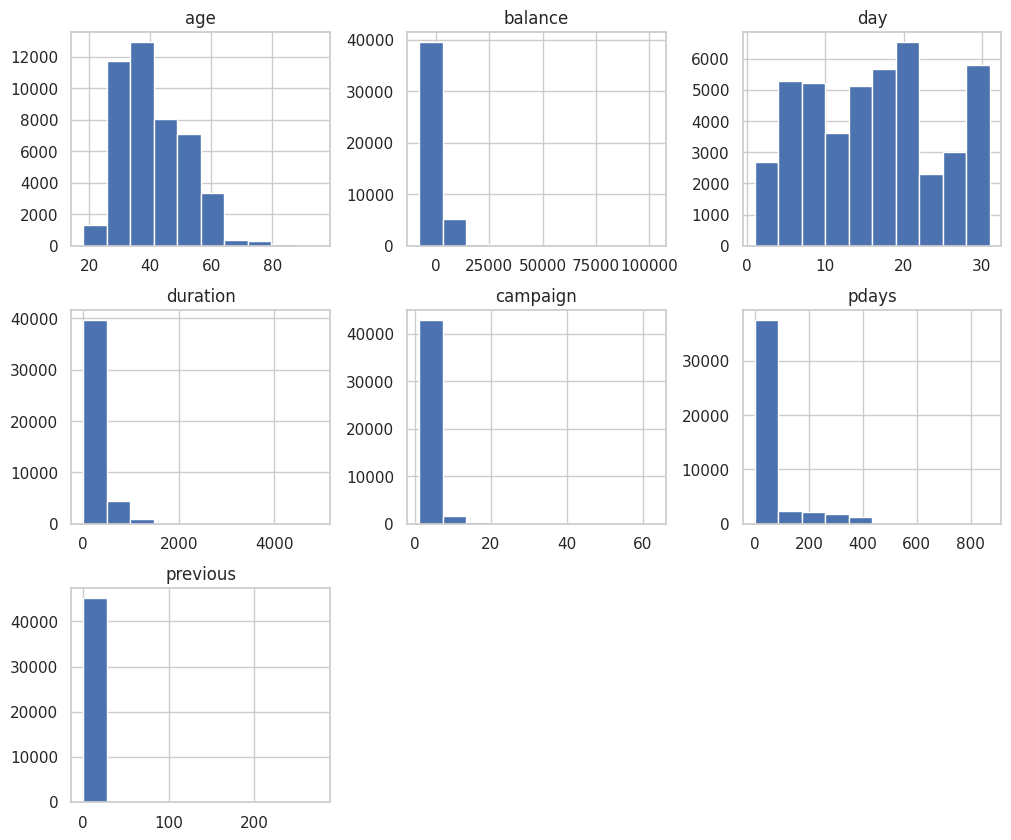

In [66]:
data.hist(figsize=(12,10))

In [67]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month',
       'y']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month', 'y']].astype('category')
data1 = data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [68]:
#Label Encoding

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['y'] = data1['y'].cat.codes

In [74]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,16]

y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int8

In [75]:
y = y.clip(lower=0)      # Replacing all negative values of y with 0

Feature selection

In [76]:
corrmat = data1.corr()
corrmat

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


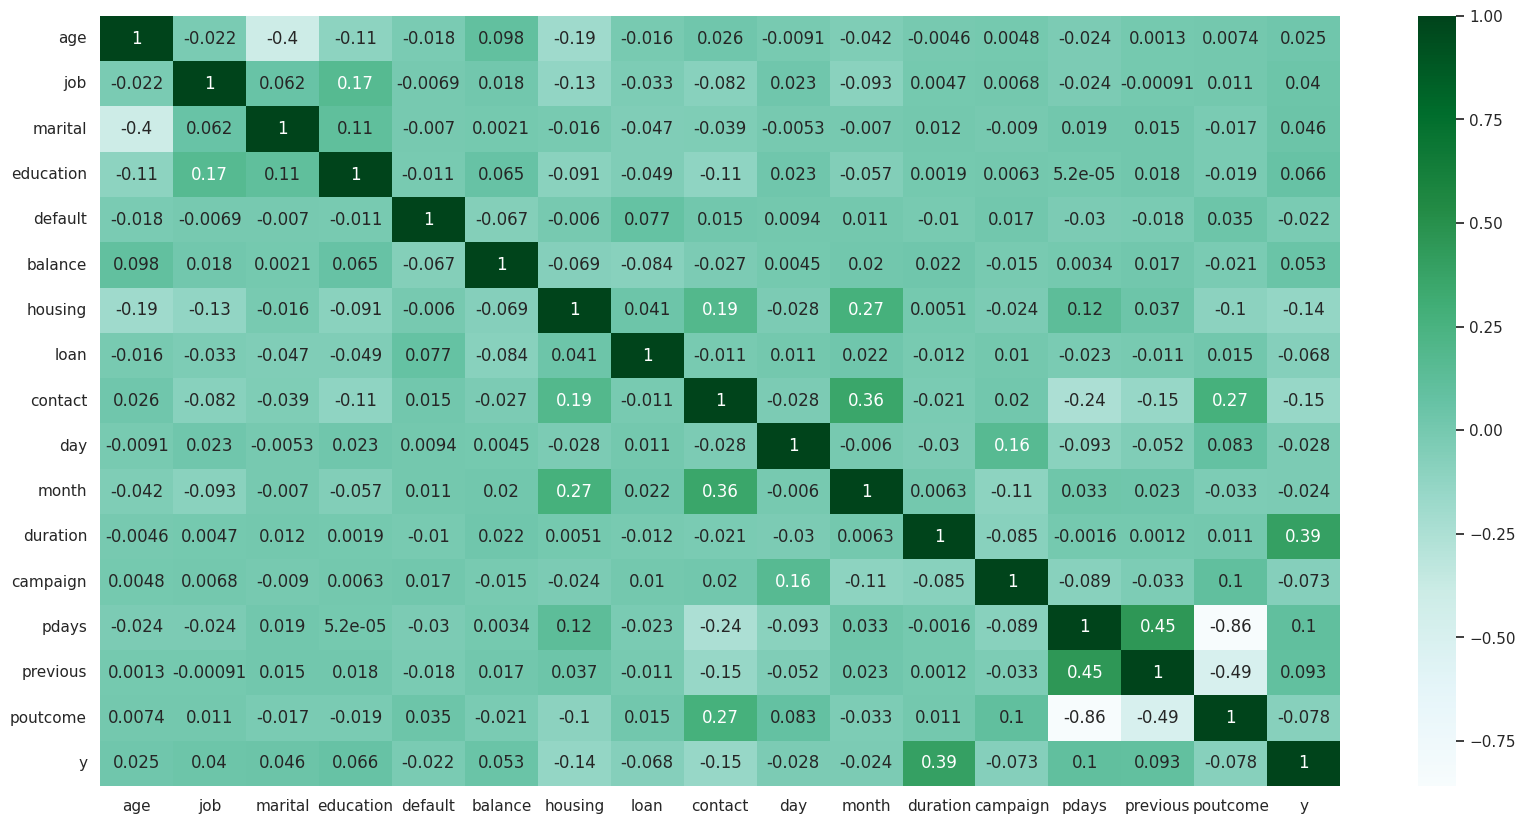

In [77]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data1[top_corr_features].corr(),annot=True,cmap="BuGn")

Univariant Selection using SelectKBest

In [78]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(x1,y)
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x1.columns)
#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(10,'Score'))  #print 10 best features

       Specs         Score
11  duration  1.807711e+06
5    balance  7.884598e+05
13     pdays  1.171871e+05
14  previous  3.593220e+03
8    contact  1.253814e+03
12  campaign  8.405821e+02
6    housing  3.889497e+02
1        job  1.824523e+02
7       loan  1.765161e+02
9        day  1.592004e+02


In [80]:
data_y = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
data_y.head(5)

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [81]:
data_y.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [82]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

In [83]:
data_y.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


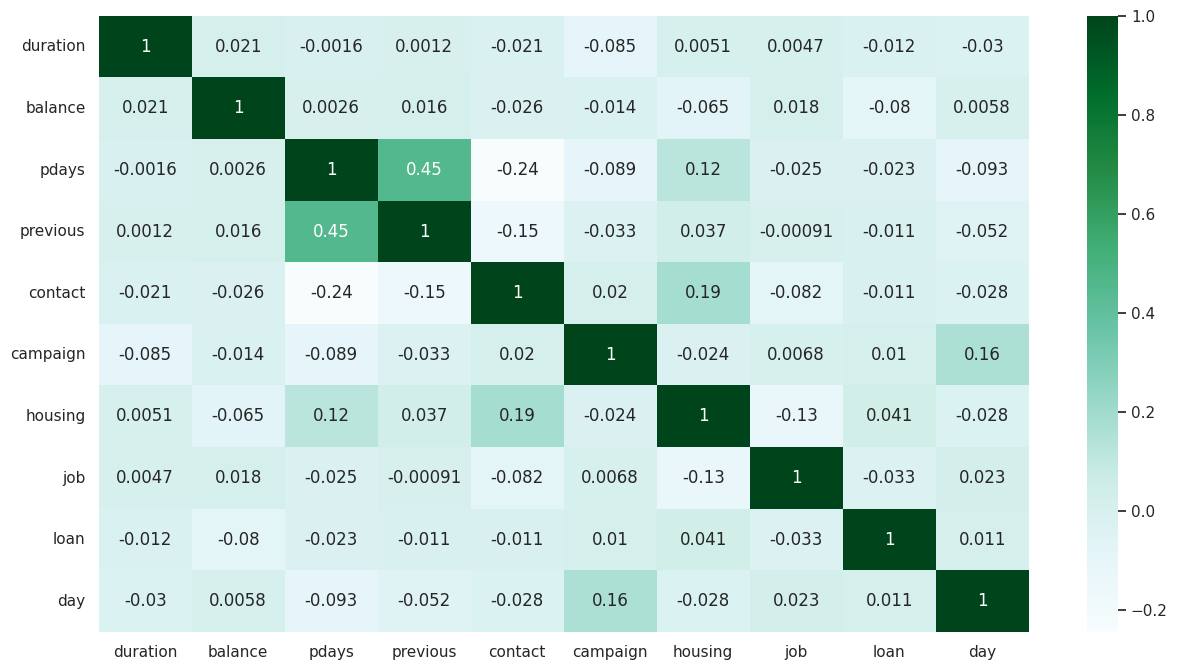

In [84]:
plt.figure(figsize=(15,8))
g1 = sns.heatmap(data_y.corr(), annot=True, cmap= 'BuGn')

Model Building

In [85]:
classifier1 = sm.Logit(y, data_y).fit()

Optimization terminated successfully.
         Current function value: 0.292027
         Iterations 8


In [86]:
classifier1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45201
Method:                           MLE   Df Model:                            9
Date:                Wed, 13 Sep 2023   Pseudo R-squ.:                  0.1908
Time:                        08:03:41   Log-Likelihood:                -13203.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
duration       0.0033   5.71e-05     57.265      0.000       0.003       0.003
balance     -1.06e-05   4.92e-06     -2.154      0.031   -2.03e-05   -9.55e-07
pdays          0.0007      0.000      4.418      0.000       0.000       0.001
previous       0.0633      0.008      7.973      0.000       0.048       0.079
contact       -0.7889      0.025    -32.092      0.000      -0.837      -0.741
campaign      -0.3301      0.011    -28.950      0.000      -0.352      -0.308
housing       -1.4508      0.034    -42.724      0.000      -1.517      -1.384
job           -0.0937      0.005    -20.621      0.000      -0.103      -0.085
loan          -1.0626      0.055    -19.331      0.000      -1.170      -0.955
day           -0.0517      0.002    -30.179      0.000      -0.055      -0.048
==============================================================================
"""

In [87]:
classifier1.params

duration    0.003271
balance    -0.000011
pdays       0.000733
previous    0.063267
contact    -0.788923
campaign   -0.330111
housing    -1.450791
job        -0.093711
loan       -1.062574
day        -0.051714
dtype: float64

In [89]:
y_pred1 = classifier1.predict(data_y)
y_pred1.head(4)

0    0.040651
1    0.018576
2    0.009769
3    0.031490
dtype: float64

In [90]:
y_pred1 = list(map(round, y_pred1))
y_pred1 = pd.DataFrame(y_pred1)
prediction1 = pd.concat([y,y_pred1], axis = 1)
prediction1.head(5)

,y,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [91]:
prediction1.tail(5)

,y,0
45206,1,1
45207,1,0
45208,1,1
45209,0,0
45210,0,1


In [92]:
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(data_y)
scaled_y = scalar.transform(data_y)
scaled_y

array([[5.30703538e-02, 2.09836772e-02, 0.00000000e+00, ...,
        3.63636364e-01, 0.00000000e+00, 1.33333333e-01],
       [3.07035380e-02, 2.83960167e-04, 0.00000000e+00, ...,
        8.18181818e-01, 0.00000000e+00, 1.33333333e-01],
       [1.54534364e-02, 1.95834598e-05, 0.00000000e+00, ...,
        1.81818182e-01, 1.00000000e+00, 1.33333333e-01],
       ...,
       [2.29158194e-01, 5.59597364e-02, 2.11251435e-01, ...,
        4.54545455e-01, 0.00000000e+00, 5.33333333e-01],
       [1.03294022e-01, 6.54087558e-03, 0.00000000e+00, ...,
        9.09090909e-02, 0.00000000e+00, 5.33333333e-01],
       [7.34038227e-02, 2.90912295e-02, 2.15843858e-01, ...,
        1.81818182e-01, 0.00000000e+00, 5.33333333e-01]])

In [96]:
classifier2 = LogisticRegression()
classifier2.fit(scaled_y,y)

LogisticRegression()

In [97]:
classifier2.coef_

array([[17.72273709,  2.00537386,  2.32192876,  3.68882538, -1.16168868,
        -6.09988223, -1.03019879,  0.1610244 , -0.7190179 , -0.16780812]])

In [99]:
proba = classifier2.predict_proba(scaled_y)
proba

array([[0.97326394, 0.02673606],
       [0.98128176, 0.01871824],
       [0.99364193, 0.00635807],
       ...,
       [0.13320987, 0.86679013],
       [0.82180956, 0.17819044],
       [0.63926829, 0.36073171]])

In [100]:
y_pred2 = classifier2.predict(scaled_y)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

Model Validation

In [101]:
conf_matrix = confusion_matrix(y,y_pred2)
print(conf_matrix)

[[39265   657]
 [ 4303   986]]


In [102]:
pd.crosstab(y,y_pred2)

col_0,0,1
y,,
0,39265,657
1,4303,986


In [103]:
accuracy = sum(y==y_pred2)/data.shape[0]           #data.shape[0] : All rows
accuracy

0.8902921855300702

In [104]:
print( classification_report(y,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [105]:
roc_score = roc_auc_score(y, y_pred2)
roc_score

0.584983781808067

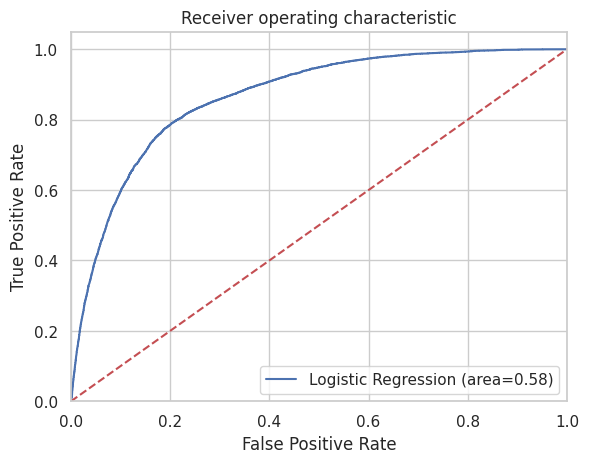

In [106]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% roc_score)
plt.plot([0, 1], [0, 1],'r--')     # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [108]:
# Splitting the data for training and testing

xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.20, random_state = 10)

standardizing 'xtrain' and 'xtest'¶

In [109]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

xtrain = sc_x.fit_transform(xtrain)

xtest = sc_x.transform(xtest)
print(xtrain[0:5,:])

[[-0.65088882  1.42538934 -0.28034739 -0.29935601 -0.13570288 -0.5252383
   0.89399326 -0.43702462 -0.71144243  0.62689417 -1.50058562 -0.30738733
  -0.24894678 -0.41233124 -0.24419181  0.44544699]
 [ 0.00960044 -1.01971428 -0.28034739 -1.63934464 -0.13570288  0.02081698
   0.89399326  2.28820062 -0.71144243 -0.93643115  0.82666646 -0.29571388
  -0.57282833 -0.41233124 -0.24419181  0.44544699]
 [ 0.38702287 -1.01971428 -0.28034739 -0.29935601 -0.13570288 -0.3967547
   0.89399326  2.28820062  1.51764318 -0.21489639  0.82666646 -0.92218909
   2.34210565 -0.41233124 -0.24419181  0.44544699]
 [-0.27346639  0.50847548 -0.28034739 -0.29935601 -0.13570288 -0.34841113
   0.89399326 -0.43702462  1.51764318  0.50663838  0.82666646  0.43193125
  -0.57282833 -0.41233124 -0.24419181  0.44544699]
 [-0.55653321 -1.01971428  1.36569227 -0.29935601 -0.13570288  2.16610369
   0.89399326 -0.43702462 -0.71144243 -0.33515218  0.82666646 -0.33073423
  -0.24894678 -0.41233124 -0.24419181  0.44544699]]


In [110]:
print(xtest[0:5,:])

[[ 1.33057896  1.42538934 -1.92638705 -0.29935601 -0.13570288 -0.44250265
   0.89399326 -0.43702462  1.51764318  0.50663838  0.82666646  0.41636665
   0.39881633 -0.41233124 -0.24419181  0.44544699]
 [-0.93395565  0.50847548  1.36569227  1.04063262 -0.13570288  0.14800277
   0.89399326 -0.43702462  1.51764318  0.50663838  0.82666646 -0.73930502
  -0.57282833 -0.41233124 -0.24419181  0.44544699]
 [-1.21702248 -0.10280042  1.36569227  1.04063262 -0.13570288  0.28849114
   0.89399326 -0.43702462  1.51764318  0.26612679  0.16173729  2.52147902
  -0.24894678 -0.41233124 -0.24419181  0.44544699]
 [-1.21702248  1.42538934 -0.28034739 -0.29935601 -0.13570288  1.97435166
   0.89399326 -0.43702462 -0.71144243 -1.05668694  0.82666646 -0.25291122
  -0.57282833 -0.41233124 -0.24419181  0.44544699]
 [ 0.19831166 -0.71407633 -0.28034739 -0.29935601 -0.13570288 -0.42335989
  -1.11857666 -0.43702462  1.51764318 -0.33515218  0.82666646  0.69652948
  -0.24894678 -0.41233124 -0.24419181  0.44544699]]
